# (Passengers characteristics and chances to live during the titanic sinking )
## by (Osama Mohamed Saad Elahwel)

## Investigation Overview

> In this invistigation i wanted to analyse the characteristics of passengers and how they affect passengers chances to live during the titanic sinking and the main attributes i worked on are (alive,who,age,fare,embark_town,alone)

## Dataset Overview

> Titanic dataset from Kaggle it consist of 891 record of passengers alive and other atrributes include age,who,sex,alone,fare,embark_town data have missing values in age column and i fixed it by replacing it with the mean of the passengers aged with the same title in their names and 3 records are deleted as they affect the fare column analysis we also droped two missing values of the embark_town column.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
titanic = pd.read_csv('titanic.csv')

In [8]:
# Add new column that indicate the embarked city by its name insted of small labels
titanic['embark_town'] = 'NaN'
titanic.loc[titanic.Embarked == 'S' , 'embark_town'] ='Southampton'
titanic.loc[titanic.Embarked == 'C' , 'embark_town'] ='Cherbourg'
titanic.loc[titanic.Embarked == 'Q' , 'embark_town'] ='Queenstown'

#Making new column named alive that indicate the state of the passenger living instead of 1 and 0
titanic['alive'] = 'NaN'
titanic.loc[titanic.Survived == 1 , 'alive'] , titanic.loc[titanic.Survived == 0 , 'alive'] = 'yes' , 'no'

#Making a new boolian column that indicate if the passenger is alone or not  
titanic['alone'] = True
titanic.loc[((titanic.SibSp == 0) &(titanic.Parch == 0) )  , 'alone'] , titanic.loc[titanic.SibSp != 0 , 'alone'] = True , False

#Making new column that indicate the Pclass in terms on strings named class 
titanic['class'] = "NaN"
titanic.loc[titanic.Pclass == 1 , 'class'] ='First'
titanic.loc[titanic.Pclass == 2 , 'class'] ='Second'
titanic.loc[titanic.Pclass == 3 , 'class'] ='Third'

#Filling nan values in age column by mean of the title on the passengers Mr, Ms etc as they are more likely to be in the same age.
titanic.Name = titanic.Name.str.extract(' ([A-Za-z]+)\.')
titanic.Age.fillna(titanic.groupby('Name')['Age'].transform('median') , inplace = True)

# new column that indicate if the passenger is child, Man or woman 
titanic['who'] = 'NaN'
titanic.loc[titanic.Age <= 15 , 'who'] ='child'
titanic.loc[(titanic.Age > 15) & (titanic.Sex == 'male'), 'who'] ='man'
titanic.loc[(titanic.Age > 15) & (titanic.Sex == 'female'), 'who'] ='woman'

#Drop the 2 null values in the embark_town column
titanic.drop(titanic.query("embark_town == 'NaN'").index, inplace = True)

#Droping unnessesary columns
colmns = ['PassengerId' , 'Ticket' , 'Cabin' , 'Pclass' ,'Parch','SibSp' ]
titanic.drop(colmns , axis = 1 , inplace= True)

#Lowering case columns names
titanic.columns = titanic.columns.str.lower()


# convert class into ordered categorical type
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories =['First' , 'Second' , 'Third'] )
titanic['class'] = titanic['class'].astype(ordered_var)

#Droping 3 outliers
titanic.drop(titanic.query("fare > 500").index , inplace= True)


## (Alive to Death Graph)

>Passsengers Whom died are more than whom lived after the Titanic crashed.


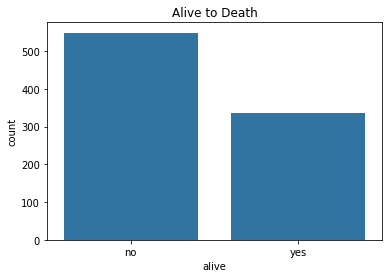

In [22]:
base = sb.color_palette()[0]
sb.countplot(data = titanic , x = 'alive' , color= base )
plt.title("Alive to Death")
plt.show()

## (Ditribution of Passengers Classes)

> There were three classes for passengers First,Second and Third class most of the passengers where in the third class as it was the cheapest one.

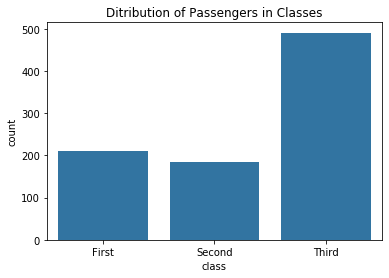

In [30]:
default_color = sb.color_palette()[0]
sb.countplot(data = titanic, x = 'class', color = default_color)
plt.title("Ditribution of Passengers in Classes")
plt.show()

## (Passengers Age Distribution)

>Age distribution shows alot of passengers whom age start from 18 years old which is the legal age with a large spike from 30 to 33 and numbers decreased from 36 to 45 also there was some children under 12 years.

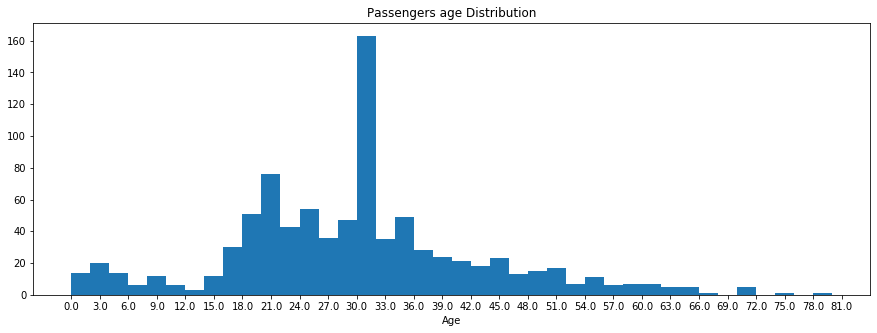

In [24]:
binsize = 2
bins = np.arange(0, titanic.age.max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = titanic, x = 'age', bins = bins)
plt.xlabel('Age')
tic = np.arange(0,titanic.age.max()+3,3)
plt.xticks(tic,tic)
plt.title("Passengers age Distribution")
plt.show()

## (Sex vs Alive)

>Most of womens and childreen were alive after crash unlike men whom almost died, So if u were a man on titninc then u are more likely to die.

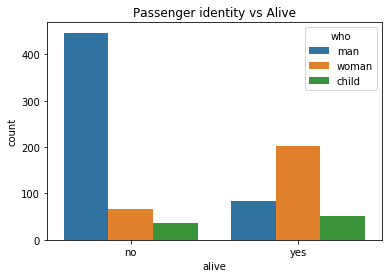

In [25]:
sb.countplot(data = titanic , x = 'alive' , hue = 'who')
plt.title("Passenger identity vs Alive")
plt.show()

## (Alive vs Class)

>Most of the passengers whom were in the Third class died but in First class alive passengers are more then died ones.

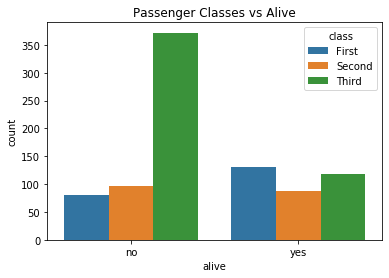

In [26]:
sb.countplot(data = titanic , x = 'alive' , hue = 'class')
plt.title("Passenger Classes vs Alive")
plt.show()

## (Alone passengers vs Alive)

>Alone passengers were more likely to die than passengers with companions.

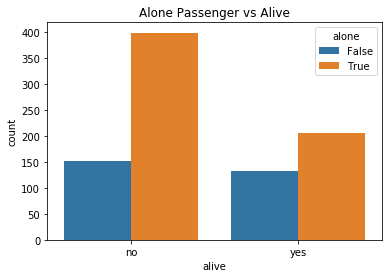

In [27]:
sb.countplot(data = titanic , hue = 'alone' , x = 'alive')
plt.title("Alone Passenger vs Alive")
plt.show()

## (Sex and Class To Alive)

>Like what we found most of the men where in the third class and most of them died unlike women whom almost survived and most of them were in the first and second class.

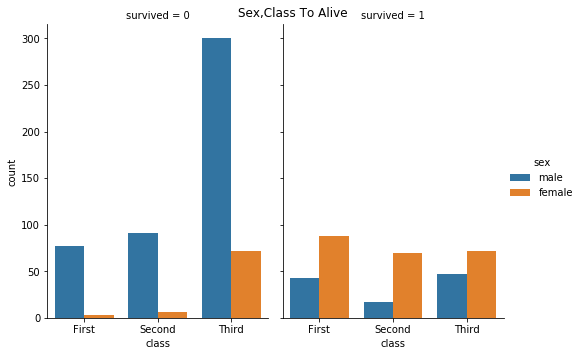

In [44]:
g= sb.catplot(data=titanic, x="class", hue="sex", col="survived" , kind="count",height=5, aspect=.7)
plt.suptitle("Sex,Class To Alive")
plt.show()

## (Age and class for Alive)

>Younger aged paggengers of every class are more likely to live, as even if some passengers where in the first class where they had higher chance to live they may die if they were old and same for other classes.

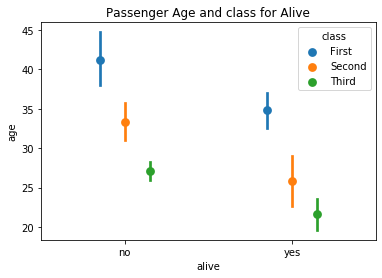

In [29]:
ax = sb.pointplot(data = titanic, x = 'alive', y = 'age', hue = 'class',dodge = 0.3, linestyles = "")
plt.title("Passenger Age and class for Alive")
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
#jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle